In [1]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from wordcloud import WordCloud, STOPWORDS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy


In [4]:
tweets = pd.read_csv('/content/Elon_musk.csv' ,  encoding='Latin-1')

In [5]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
tweets = tweets.iloc[:,1:]

In [7]:
tweets


,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
tweets=[Text.strip() for Text in tweets.Text]

In [9]:
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
len(tweets)

1999

In [11]:
text = [Text for Text in tweets if Text]

In [12]:
text

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [13]:
text=' '.join(text)

In [14]:
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [15]:
len(text)

158702

In [16]:
from nltk.tokenize import TweetTokenizer

In [17]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

In [18]:
tweet_tknz =  tknzr.tokenize(text)

In [19]:
tweet_tknz

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'next-level',
 '.',
 'Have',
 'you',
 'tried',
 'it',
 '?',
 'Great',
 'interview',
 '!',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '!',
 '!',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 '!',
 'https://t.co/9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 ',',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 ',',
 'Himself',
 'most',
 'of',
 'all',
 '.',
 'https://t.co/zGxJFDzzrM',
 'Haha',
 'thanks',
 ':)',
 'Indeed',
 '!',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real-world',
 'time',
 'allocation',
 '.',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'https://t.co/3rWE9uHSTS',
 'It',
 '

In [20]:
tweet_tknz = ' '.join(tweet_tknz)

In [21]:
tweet_tknz

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [22]:
import re

In [23]:
#to remove url/links
tweet_tknz = re.sub('http://\S+|https://\S+', '', tweet_tknz)

In [24]:
tweet_tknz

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox !  Frodo was the underdoge , All thought he would fail , Himself most of all .  Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission !  Yes Once we ca

In [25]:
#to remove ! , / , =
tweet_tknz = re.sub(r'!+(?=.*\!)','',tweet_tknz)

In [26]:

tweet_tknz

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge , All thought he would fail , Himself most of all .  Haha thanks :) Indeed  Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can pred

In [27]:
#to remove  numbers
tweet_tknz = re.sub(r'\d+', '', tweet_tknz)

In [28]:
tweet_tknz

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge , All thought he would fail , Himself most of all .  Haha thanks :) Indeed  Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+F> <U+F> This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow 

In [29]:
no_punc_text= tweet_tknz.translate(str.maketrans('','',string.punctuation))
no_punc_text


'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account UF UF This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well  Sta

In [30]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
text_tokens = word_tokenize(no_punc_text)

In [32]:
text_tokens

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '\x92',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitel

In [33]:
len(text_tokens)

17521

In [34]:
from nltk.corpus import stopwords

In [35]:
my_stop_words=stopwords.words('english')

In [36]:
stops = ['\x92' , 'U0001F923', 'U0001F923' , 'haha' , 'X','RT' , '\x97','UF']

In [37]:
my_stop_words.extend(stops)

In [38]:
no_stop_tokens=[word for word in text_tokens if word not in my_stop_words]

In [39]:
no_stop_tokens

['I',
 'alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'Great',
 'interview',
 'Doge',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'It',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'toddler',
 'hodler',
 'He',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'Thanks',
 'fixing',
 'Please',
 'unlock',
 'account',
 'This',
 'true',
 'power',
 'Any',
 'crypto',
 'wallet',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'Your',
 'app',
 'sucks',
 'NASA',
 'selected',
 'Falcon',
 'Heavy',
 'launch',
 'first',
 'two',
 'eleme

In [40]:
len(no_stop_tokens)

11135

In [41]:
lower =[Text.lower() for Text in no_stop_tokens]

In [42]:
lower

['i',
 'alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thanks',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'it',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'thanks',
 'fixing',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'any',
 'crypto',
 'wallet',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'your',
 'app',
 'sucks',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'eleme

In [43]:
from nltk.stem import PorterStemmer

In [44]:
ps=PorterStemmer()

In [45]:
stem_token = [ps.stem(token) for token in lower ]

In [46]:
stem_token

['i',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'it',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'pleas',
 'unlock',
 'account',
 'thi',
 'true',
 'power',
 'ani',
 'crypto',
 'wallet',
 'give',
 'privat',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'nasa',
 'select',
 'falcon',
 'heavi',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'togeth',
 'one',
 'mission',
 'ye',
 'onc'

In [47]:
nlp =spacy.load('en_core_web_sm')


In [48]:
doc=nlp(' '.join(lower))

In [49]:
doc

i alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks nasa selected falcon heavy launch first two elements lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth

In [50]:
lemmas=[token.lemma_ for token in doc]

In [51]:
lemmas

['i',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'think',
 'would',
 'fail',
 '-PRON-',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 '-PRON-',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 '-PRON-',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'any',
 'crypto',
 'wallet',
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 '-PRON-',
 'app',
 'suck',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gat

In [52]:
clean_tweets=' '.join(lemmas)
clean_tweets

'i alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimated congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail -PRON- haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse -PRON- get real buy dogecoin lil toddler hodler -PRON- definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost -PRON- app suck nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g -PRON- mean price country only difference taxis ship this intend earth may idea apply mars xprize tea

In [53]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.3 MB/s 


In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [57]:
score_clean_tweets = analyzer.polarity_scores(clean_tweets)
score_clean_tweets

{'compound': 1.0, 'neg': 0.073, 'neu': 0.645, 'pos': 0.282}

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
positive sentiment : (compound score >= 0.05) 
neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
negative sentiment : (compound score <= -0.05)

# *from here we get an idea that the overall sentiment in these tweets are positive because the compound score is 1 which is  greater than 0.05*


In [58]:
emotion_lexicon = pd.read_csv('/content/Afinn.csv', encoding="ISO-8859-1")

In [59]:
emo_words = emotion_lexicon ['word'].tolist()

In [60]:
emo_tweets = [word for word in lemmas if word in emo_words]

In [61]:
emo_tweets

['great',
 'underestimated',
 'congratulation',
 'amazing',
 'happy',
 'fail',
 'haha',
 'thank',
 'entertaining',
 'agree',
 'sentencing',
 'thank',
 'please',
 'avoid',
 'suck',
 'yes',
 'difficult',
 'negative',
 'miss',
 'wow',
 'improve',
 'cute',
 'misleading',
 'pain',
 'fun',
 'easy',
 'intense',
 'yes',
 'great',
 'yeah',
 'great',
 'wow',
 'clear',
 'solution',
 'yes',
 'yeah',
 'good',
 'yes',
 'risk',
 'yes',
 'foolish',
 'masterpiece',
 'dumb',
 'no',
 'no',
 'welcome',
 'entertaining',
 'progress',
 'super',
 'hard',
 'ensure',
 'safety',
 'dream',
 'aboard',
 'advanced',
 'weird',
 'help',
 'hopefully',
 'good',
 'please',
 'solve',
 'great',
 'alert',
 'big',
 'fan',
 'great',
 'important',
 'no',
 'escaping',
 'warm',
 'beautiful',
 'yeah',
 'hope',
 'great',
 'die',
 'good',
 'love',
 'great',
 'great',
 'useful',
 'great',
 'matter',
 'better',
 'yes',
 'fine',
 'improvement',
 'yes',
 'yeah',
 'annoying',
 'no',
 'obstacle',
 'yeah',
 'trap',
 'top',
 'discord',
 'd

In [63]:
emo_tw = pd.DataFrame(emo_tweets , columns = ['word'])

In [66]:
emo_tw

,word
0,great
1,underestimated
2,congratulation
3,amazing
4,happy
...,...
1305,easy
1306,accept
1307,dumb
1308,dumb


In [64]:
emotions_in_review = pd.merge(emo_tw, emotion_lexicon , on = "word")

In [65]:
emotions_in_review

,word,value
0,great,3
1,great,3
2,great,3
3,great,3
4,great,3
...,...,...
1305,danger,-2
1306,danger,-2
1307,strength,2
1308,dire,-3


In [67]:
emotions_in_review = emotions_in_review.drop_duplicates(subset=None, keep='first')

In [68]:
emotions_in_review 

,word,value
0,great,3
78,underestimated,-1
79,congratulation,2
88,amazing,4
97,happy,3
...,...,...
1304,collapse,-2
1305,danger,-2
1307,strength,2
1308,dire,-3


In [80]:
emotions_in_review['value'].describe()

count    289.000000
mean       0.346021
std        2.035619
min       -4.000000
25%       -2.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: value, dtype: float64

# **since the mean of all the sentiment scores is positive , We can definitively conclude that the overall sentiment in the tweets are positive**

In [69]:
emo_words_list = emotions_in_review ['word'].tolist()

In [72]:
from wordcloud import WordCloud

In [73]:
pstv_words = []

p = open('/content/postv.txt')
for word in p.read().split():
    pstv_words.append(word)

# positive words in the tweets

In [74]:
positive_tweets = [word for word in emo_words_list if word in pstv_words]

In [76]:
positive_tweets_join = ' '.join(positive_tweets)

In [77]:
wordcloud_positive = WordCloud(
                      background_color='yellow',
                      width=2500,
                      height=2500
                     ).generate(positive_tweets_join)

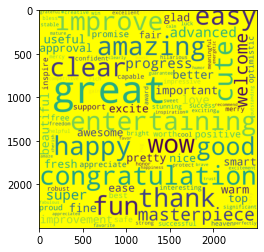

In [78]:
plt.imshow(wordcloud_positive) 